In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from gapminder import gapminder

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Para componentes principales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
datos = sns.load_dataset("tips")
datos.head()

In [ ]:
X = pd.DataFrame(datos["total_bill"])
y = pd.DataFrame(datos["tip"])

In [ ]:
# Separar los datos en conjuntos de entrenamiento (train) y testeo (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Opciones de parámetros de train_test_split:
# - random_state: Semilla para asegurar la reproducibilidad

In [ ]:
X_train.shape

In [ ]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo.fit(X_train, y_train)   # Realizamos el ajuste
y_pred = modelo.predict(X_test) # Hacemos las predicciones
ECM = mean_squared_error(y_test, y_pred) # Evaluamos el modelo usando ECM
print(f"ECM: {ECM:.2f}")
print(f"Ordenada: {modelo.intercept_.item()}")
print(f"Coeficientes: {modelo.coef_.item()}")

El código está realizando lo siguiente:
1. Inicializa un modelo de regresión lineal.
2. Ajusta el modelo utilizando los datos de entrenamiento ("X_train", "y_train")
3. Realiza predicciones utilizando los datos de prueba ("X_test")
4. Calcula el ECM comparando las predicciones con los valores reales
El ECM te proporciona una medida de cuán bien se ajusta el modelo a los datos. Cuanto más bajo el ECM, mejor será el ajuste del modelo a los datos de prueba.
El intercepto (la ordenada) y los coeficientes te dan información sobre la ecuación de regresión lineal que se ajustó a los datos. La ordenada es el valor estimado de la variable dependiente cuando todas las variables independientes son 0, y los coeficientes te indican cómo cambia la variable dependiente por cada unidad de cambio en las variables independientes, manteniendo todas las demás constantes.

In [ ]:
modelo.predict(pd.DataFrame({'total_bill': [35]})).item() # queremos predecir la propina que se deja por una cuenta de $35

In [ ]:
pip install formulaic

In [8]:
from formulaic import model_matrix

In [9]:
from formulaic import Formula

In [ ]:
df = pd.DataFrame({
 'y': [0, 1, 2],
 'a': ['A','B','C'],
 'b': [0.3, 0.1, 0.2],
})

In [69]:
y, X = model_matrix("y ~ a + b + a:b", df)
pd.concat([y,X], axis = 1)

,y,Intercept,a[T.B],a[T.C],b,a[T.B]:b,a[T.C]:b
0,0,1.0,0,0,0.3,0.0,0.0
1,1,1.0,1,0,0.1,0.1,0.0
2,2,1.0,0,1,0.2,0.0,0.2


Para ver tema entrenamiento vamos a usar un ejemplo de nutricion, calorías de alimentos

In [70]:
df_nutricion = pd.read_csv("nutrition.csv")
df_nutricion.head()

,FDC_ID,Item,Category,Calorias_kcal,Proteinas_g,Carbohidratos_g,GrasaTotal_g,Colesterol_mg,Fibra_g,Agua_g,Alcohol_g,VitaminaC_mg
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88,41.18,13.24,0.0,1.2,35.50,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34,53.42,11.27,0.0,1.4,27.86,NaN,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.10,79.80,3.70,NaN,NaN,3.20,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.00,46.00,1.80,NaN,NaN,42.60,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0


In [71]:
# Utilizamos fillna para convertir NaN a 0.
df_nutricion = df_nutricion.fillna(0)

In [72]:
df_nutricion.head()

,FDC_ID,Item,Category,Calorias_kcal,Proteinas_g,Carbohidratos_g,GrasaTotal_g,Colesterol_mg,Fibra_g,Agua_g,Alcohol_g,VitaminaC_mg
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88,41.18,13.24,0.0,1.2,35.50,0.0,0.0
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34,53.42,11.27,0.0,1.4,27.86,0.0,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.10,79.80,3.70,0.0,0.0,3.20,0.0,0.0
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.00,46.00,1.80,0.0,0.0,42.60,0.0,0.0
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0


Construimos las matrices X e y usando formulaic

In [79]:
y, X = (
    Formula('Calorias_kcal ~ Proteinas_g + Carbohidratos_g + GrasaTotal_g + Colesterol_mg + Fibra_g + Agua_g + Alcohol_g + VitaminaC_mg')
    .get_model_matrix(df_nutricion)
)

In [80]:
#X = df_nutricion[["Proteinas_g", "Carbohidratos_g", "GrasaTotal_g", "Colesterol_mg", "Fibra_g", "Agua_g", "Alcohol_g", "VitaminaC_mg"]]
#y = df_nutricion["Calorias_kcal"]

In [81]:
X.head()

,Intercept,Proteinas_g,Carbohidratos_g,GrasaTotal_g,Colesterol_mg,Fibra_g,Agua_g,Alcohol_g,VitaminaC_mg
0,1.0,5.88,41.18,13.24,0.0,1.2,35.50,0.0,0.0
1,1.0,4.34,53.42,11.27,0.0,1.4,27.86,0.0,0.1
2,1.0,6.10,79.80,3.70,0.0,0.0,3.20,0.0,0.0
3,1.0,8.00,46.00,1.80,0.0,0.0,42.60,0.0,0.0
4,1.0,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0


In [82]:
y.head()

,Calorias_kcal
0,307.0
1,330.0
2,377.0
3,232.0
4,273.0


Antes de separar en entrenamiento y testeo, veamos los errores del modelo lineal con todos los datos 

In [91]:
modelo = linear_model.LinearRegression(fit_intercept = False) # inicializamos un modelo de regresión lineal
# ponemos intercept = false porque la matriz X ya tiene el intercept, entonces no lo agregamos.
modelo.fit(X, y)

LinearRegression(fit_intercept=False)

In [92]:
modelo.coef_

array([[-1.99226673e+01,  4.34651763e+00,  4.18103540e+00,
         9.05028271e+00,  5.63009593e-03, -1.66584211e+00,
         2.12557302e-01,  7.05470045e+00, -2.51921498e-02]])

In [93]:
y_pred = modelo.predict(X)
# Calculando el R^2
r2 = r2_score(y, y_pred)
print('R^2: ', r2)

# Calculando el ECM
ecm = mean_squared_error(y, y_pred)
print('Raiz cuadrada del ECM: ', np.sqrt(ecm))

R^2:  0.9957957009157294
Raiz cuadrada del ECM:  10.941275361853489


In [94]:
len(y_pred)

7793

A priori es un buen modelo, tenemos 7792 observaciones y obtenemos R^2 casi igual a 1 con solo 9 variables.

# Conjuntos de entrenamiento y testeo

In [103]:
y, X = (
    Formula('Calorias_kcal ~ Proteinas_g + Carbohidratos_g + GrasaTotal_g + Colesterol_mg + Fibra_g + Agua_g + Alcohol_g + VitaminaC_mg')
    .get_model_matrix(df_nutricion)
)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # El parámetro test_size=0.2 indica que tomamos un 20% de los datos para testeo

In [108]:
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [110]:
y_pred = modelo.predict(X_test)

In [113]:
# Calculando el R^2
r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)

# Calculando el ECM
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadrada del ECM: ', np.sqrt(ecm))

R^2:  0.9964922558252318
Raiz cuadrada del ECM:  10.257675147285983


Vemos que el modelo ajusto bien en los datos de testeo, podemos confiar en el modelo obtenido.

## Selección de Modelos

Comparamos con un modelo utilizando solo las tres primeras variables (las de mayor peso en el modelo) y sin intercept.

In [116]:
y, X = (
    Formula('Calorias_kcal ~ Proteinas_g + Carbohidratos_g + GrasaTotal_g -1')
    .get_model_matrix(df_nutricion)
)

In [117]:
X.head()

,Proteinas_g,Carbohidratos_g,GrasaTotal_g
0,5.88,41.18,13.24
1,4.34,53.42,11.27
2,6.10,79.80,3.70
3,8.00,46.00,1.80
4,6.58,41.05,9.22


In [118]:
y.head()

,Calorias_kcal
0,307.0
1,330.0
2,377.0
3,232.0
4,273.0


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [122]:
y_pred = modelo.predict(X_test)

In [123]:
r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadrada del ECM: ', np.sqrt(ecm))

R^2:  0.9906661296314964
Raiz cuadrada del ECM:  16.732693949223897


Vemos que el modelo es un poco peor pero mucho más simple.

Conclusión: el modelo con 3 variables es útil para una cuenta rápida, pero si necesitamos una mayor precisión podemos utilizar el modelo completo.

## Ejemplo pingüinos

Queremos estudiar la relación entre la longitud y la profundidad del pico de los pingüinos.

In [124]:
pinguinos = sns.load_dataset("penguins")
pinguinos.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [126]:
pinguinos = pinguinos.dropna()

In [128]:
pinguinos.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [129]:
y, X = (
    Formula("bill_length_mm ~ bill_depth_mm")
    .get_model_matrix(pinguinos)
)

In [130]:
X.head()

,Intercept,bill_depth_mm
0,1.0,18.7
1,1.0,17.4
2,1.0,18.0
4,1.0,19.3
5,1.0,20.6


In [132]:
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y, y_pred)
print('Raiz cuadrada del ECM: ', np.sqrt(ecm))

R^2:  0.05226968139663657
Raiz cuadrada del ECM:  5.315827723866954


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


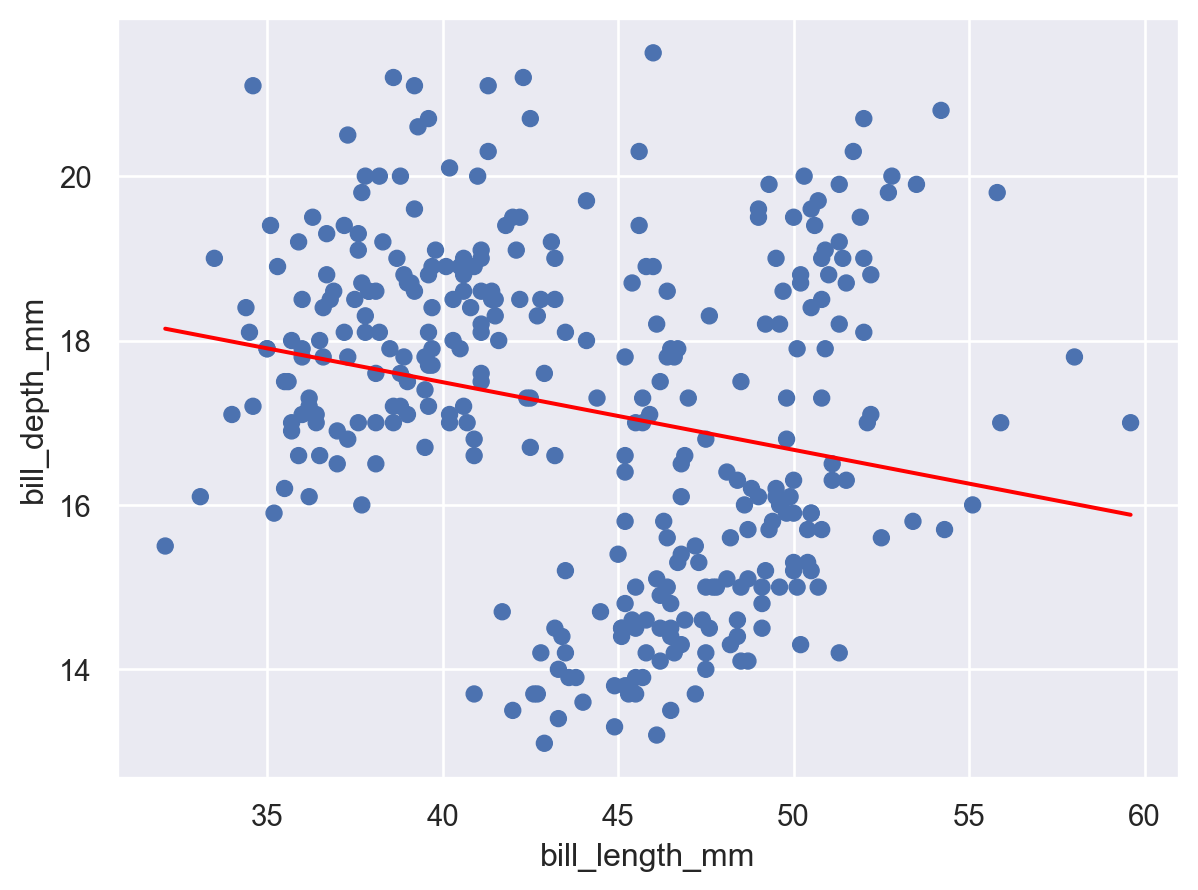

In [139]:
(
    so.Plot(data = pinguinos, x = "bill_length_mm", y = "bill_depth_mm")
    .add(so.Dot())
    .add(so.Line(color = "red"), so.PolyFit(1))
)

Hay correlación negativa porque la pendiente es negativa. Parece como que no hay mucha relación entre la profundidad y el largo del pico.
El gráfico confirma la correlación negativa

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


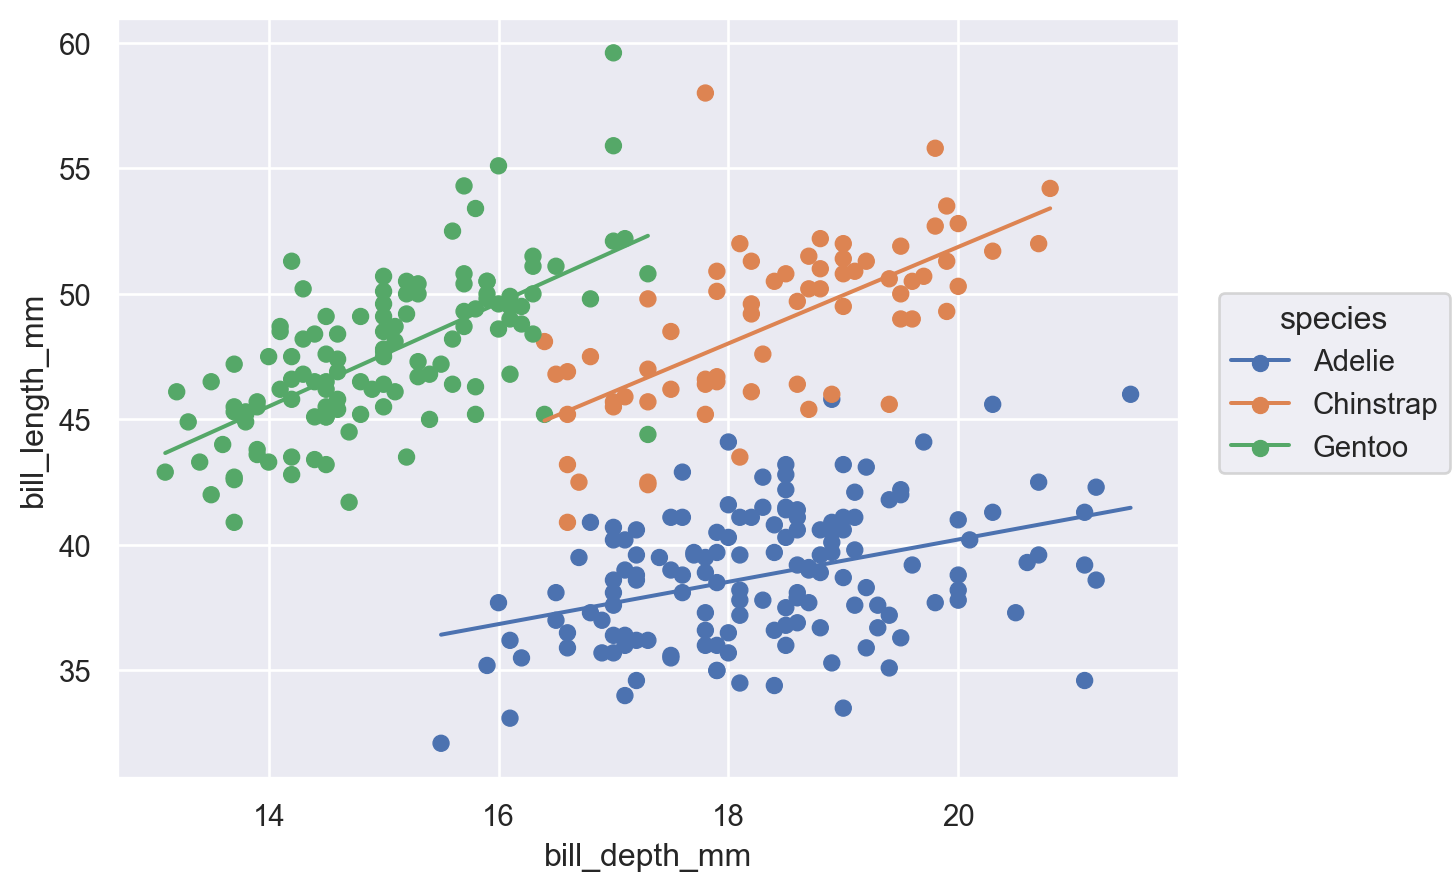

In [141]:
(
    so.Plot(data = pinguinos, x = "bill_depth_mm", y = "bill_length_mm", color = "species")
    .add(so.Dot())
    .add(so.Line(), so.PolyFit(1))
)

Ahora las rectas tienen pendiente positiva! Al considerar todas las especies al mismo tiempo, no podíamos ver esta correlación.
## La paradoja de Simpson
La paradoja de Simpson es un fenómeno estadístico en el cual una relación entre variables aparece, desaparece o se revierte al dividir a la población en subpoblaciones.

## AGREGAR TEMA VALIDACIÓN CRUZADA

In [4]:
df_salud = pd.read_csv("insurance.csv")
df_salud.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Separamos en entrenamiento y testeo, y hacemos validación cruzada en el conjunto de entrenamiento.
# Paso 1: separamos en entrenamiento y testeo el dataframe original
df_train, df_test = train_test_split(df_salud, test_size=0.2, random_state=42)
df_train.shape

(1070, 7)

In [10]:
# Paso 2A: definimos un primer modelo y lo ajustamos por validación cruzada en el conjunto de entrenamiento
formula1 = "charges ~ age + sex + bmi + children + smoker + region"
y1, X1 = (
    Formula(formula1)
    .get_model_matrix(df_train)
)
X1.head()

,Intercept,age,sex[T.male],bmi,children,smoker[T.yes],region[T.northwest],region[T.southeast],region[T.southwest]
560,1.0,46,0,19.95,2,0,1,0,0
1285,1.0,47,0,24.32,0,0,0,0,0
1142,1.0,52,0,24.86,0,0,0,1,0
969,1.0,39,0,34.32,5,0,0,1,0
486,1.0,54,0,21.47,3,0,1,0,0


In [11]:
# Definimos los subconjuntos para la validación cruzada.
# Utilizamos KFold de sklearn
cv = KFold(n_splits=5, random_state=42, shuffle=True)

In [15]:
# La forma de utilizado es a través del método split
pliegos = cv.split(X1)
pliegos

<generator object _BaseKFold.split at 0x0000020FFC849A20>

In [20]:
# Pero lo mas común es utilizarlos en un ciclo:
pliegos = cv.split(X1)
for train_index, test_index in pliegos:
    print(test_index[0:10])

[ 2  3 10 12 23 30 31 39 49 51]
[ 0  5  7  9 25 29 33 43 44 55]
[ 6 11 15 18 22 24 28 41 42 46]
[ 8 16 17 19 26 36 37 38 45 48]
[ 1  4 13 14 20 21 27 32 34 35]


In [22]:
# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, val_index in cv.split(X1):
    X_train, X_val, y_train, y_val = X1.iloc[train_index], X1.iloc[val_index], y1.iloc[train_index], y1.iloc[val_index]
    
    # Acá tenemos que hacer el ajuste y la predicción para cada pliego

In [37]:
modelo1 = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
rmse1 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

ind = 0

# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, test_index in cv.split(X1):
    X_train, X_val, y_train, y_val = X1.iloc[train_index], X1.iloc[val_index], y1.iloc[train_index], y1.iloc[val_index]
    modelo1.fit(X_train, y_train)
    
    y_pred = modelo1.predict(X_val)
    rmse1[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

In [38]:
print(rmse1)

[5603.6714797  5601.06002551 5601.94864651 5593.78511835 5621.49155797]


In [39]:
print(rmse1.mean()) # error que queremos minimizar

5604.391365607384


In [34]:
# Paso 2B: definimos otro modelo y repetimos el paso 2A
formula2 = "charges ~ age + bmi + children + region + smoker"
y2, X2 = (
    Formula(formula2)
    .get_model_matrix(df_train)
)

In [35]:
modelo2 = linear_model.LinearRegression(fit_intercept=False)
rmse2 = np.zeros(cv.get_n_splits())
ind = 0
for train_index, val_index in cv.split(X2):
    X_train, X_val, y_train, y_val = X2.iloc[train_index], X2.iloc[val_index], y2.iloc[train_index], y2.iloc[val_index]
    modelo2.fit(X_train, y_train)
    y_pred = modelo2.predict(X_val)
    rmse2[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind +1

In [36]:
print(rmse2.mean())

6116.743399901601


In [40]:
# Paso 3: de los modelos probados nos quedamos con el menor RMSE.
# Ajustamos nuestro modelo ganador en TODO el conjunto de entrenamiento. 
modelo2.fit(X1, y1)

# Realizamos las mismas transformaciones en el conjunto de testeo
y_test, X_test = (
    Formula(formula1)
    .get_model_matrix(df_test)
)

# Predicciones
y_pred = modelo1.predict(X_test)

# Bondad del ajuste
r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadrada del ECM: ', np.sqrt(ecm))

R^2:  0.7825249904886861
Raiz cuadrada del ECM:  5810.56962421008


## Regresión Ridge

In [41]:
data = pd.read_csv("BostonHousing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [42]:
formula = 'medv ~ (crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat+b)*(crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat+b)'
y, X =  Formula(formula).get_model_matrix(data)
X.head()

,Intercept,crim,zn,indus,chas,nox,rm,age,dis,rad,...,rad:tax,rad:ptratio,rad:lstat,rad:b,tax:ptratio,tax:lstat,tax:b,ptratio:lstat,ptratio:b,lstat:b
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,...,296,15.3,4.98,396.90,4528.8,1474.08,117482.40,76.194,6072.570,1976.5620
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,...,484,35.6,18.28,793.80,4307.6,2211.88,96049.80,162.692,7064.820,3627.6660
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,...,484,35.6,8.06,785.66,4307.6,975.26,95064.86,71.734,6992.374,1583.1049
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,...,666,56.1,8.82,1183.89,4151.4,652.68,87607.86,54.978,7379.581,1160.2122
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,...,666,56.1,15.99,1190.70,4151.4,1183.26,88111.80,99.671,7422.030,2115.4770


In [43]:
# Separamos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Inicializamos el modelo lineal
modeloLineal = linear_model.LinearRegression(fit_intercept = False)  # alpha is the hyperparameter equivalent to lambda

# Entrenamiento
modeloLineal.fit(X_train, y_train)

# Predicciones
y_pred = modeloLineal.predict(X_test)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")

# mejoró el error cuadrático medio

Raíz del Error Cuadrático Medio: 3.38172


Al introducir tantas variables nuevas, relacionadas con las variables originales, es muy posible que hayamos introducido colinealidad entre las variables.
Es razonable entonces intentar un modelo de mínimos cuadrados regularizados.

In [45]:
# Paso 1: separamos los datos en entrenamiento y testeo
df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)

# Construimos las matrices X e y para el entrenamiento
formula = "medv ~ (crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat+b)*(crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat+b)"
y, X = Formula(formula).get_model_matrix(df_train)

In [46]:
# Paso 2: definimos un vector de parámetros a probar
alphas = np.array([0.01, 0.1, 0.5, 1, 2, 3])

In [47]:
# Pasos 3 y 4: para cada valor de alpha, calculamos el error promedio al realizar validación cruzada de 5 pliegues en los datos de entrenamiento.

# Comenzamos con un valor de alpha fijo
alpha = alphas[0]  # alpha = 0.01

cv = KFold(n_splits=5, random_state=42, shuffle=True)  # 5 pliegos
# tab, shift + tab (para poner el código dentro de un ciclo, por ejemplo)
for alpha in alphas:
    # Inicializamos un modelo de Regresion Lineal sin intercept
    modeloRidge = linear_model.Ridge(alpha = alpha, fit_intercept = False)    
    rmse = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

    ind = 0

    # Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
    for train_index, val_index in cv.split(X):
        X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[val_index], y.iloc[train_index], y.iloc[val_index]
        modeloRidge.fit(X_train, y_train)

        y_pred = modeloRidge.predict(X_val)
        rmse[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind = ind + 1

    print(f"Para alpha = {alpha:.5f} la raíz del Error Cuadratico Medio es: {rmse.mean():.5f}")

Para alpha = 0.01000 la raíz del Error Cuadratico Medio es: 4.62878
Para alpha = 0.10000 la raíz del Error Cuadratico Medio es: 4.56949
Para alpha = 0.50000 la raíz del Error Cuadratico Medio es: 4.54304
Para alpha = 1.00000 la raíz del Error Cuadratico Medio es: 4.55236
Para alpha = 2.00000 la raíz del Error Cuadratico Medio es: 4.56598
Para alpha = 3.00000 la raíz del Error Cuadratico Medio es: 4.57144


In [48]:
# el valor óptimo es alpha = 0.5. En base a los resultados observados, agregamos algunos valores de alpha cercanos a 0.5.
alphas = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 2, 3])

for alpha in alphas:
    modeloRidge = linear_model.Ridge(alpha = alpha, fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
    rmse = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

    ind = 0

    # Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
    for train_index, val_index in cv.split(X):
        X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[val_index], y.iloc[train_index], y.iloc[val_index]
        modeloRidge.fit(X_train, y_train)

        y_pred = modeloRidge.predict(X_val)
        rmse[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind = ind + 1

    print(f"Para alpha = {alpha:.5f} la raiz del error cuadratico medio es: {rmse.mean():.5f}")


Para alpha = 0.10000 la raiz del error cuadratico medio es: 4.56949
Para alpha = 0.20000 la raiz del error cuadratico medio es: 4.55082
Para alpha = 0.30000 la raiz del error cuadratico medio es: 4.54444
Para alpha = 0.40000 la raiz del error cuadratico medio es: 4.54267
Para alpha = 0.50000 la raiz del error cuadratico medio es: 4.54304
Para alpha = 0.60000 la raiz del error cuadratico medio es: 4.54442
Para alpha = 0.70000 la raiz del error cuadratico medio es: 4.54627
Para alpha = 1.00000 la raiz del error cuadratico medio es: 4.55236
Para alpha = 2.00000 la raiz del error cuadratico medio es: 4.56598
Para alpha = 3.00000 la raiz del error cuadratico medio es: 4.57144


In [51]:
# obtuvimos el valor más chico para alpha=0.4
# Fijamos este valor y ajustamos el modelo usando todos los datos.

alpha_optimo = 0.4

modeloRidge = linear_model.Ridge(alpha = alpha_optimo, fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
modeloRidge.fit(X, y)

Ridge(alpha=0.4, fit_intercept=False)

In [52]:
# Construimos las matrices X e y para entrenamiento
formula = 'medv ~ (crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat+b)*(crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat+b)'
y_test, X_test =  Formula(formula).get_model_matrix(df_test)
        
y_pred = modeloRidge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"For alpha = {alpha_optimo:.5f} the Root Mean Squared Error is: {rmse.mean():.5f}")

For alpha = 0.40000 the Root Mean Squared Error is: 3.36832


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


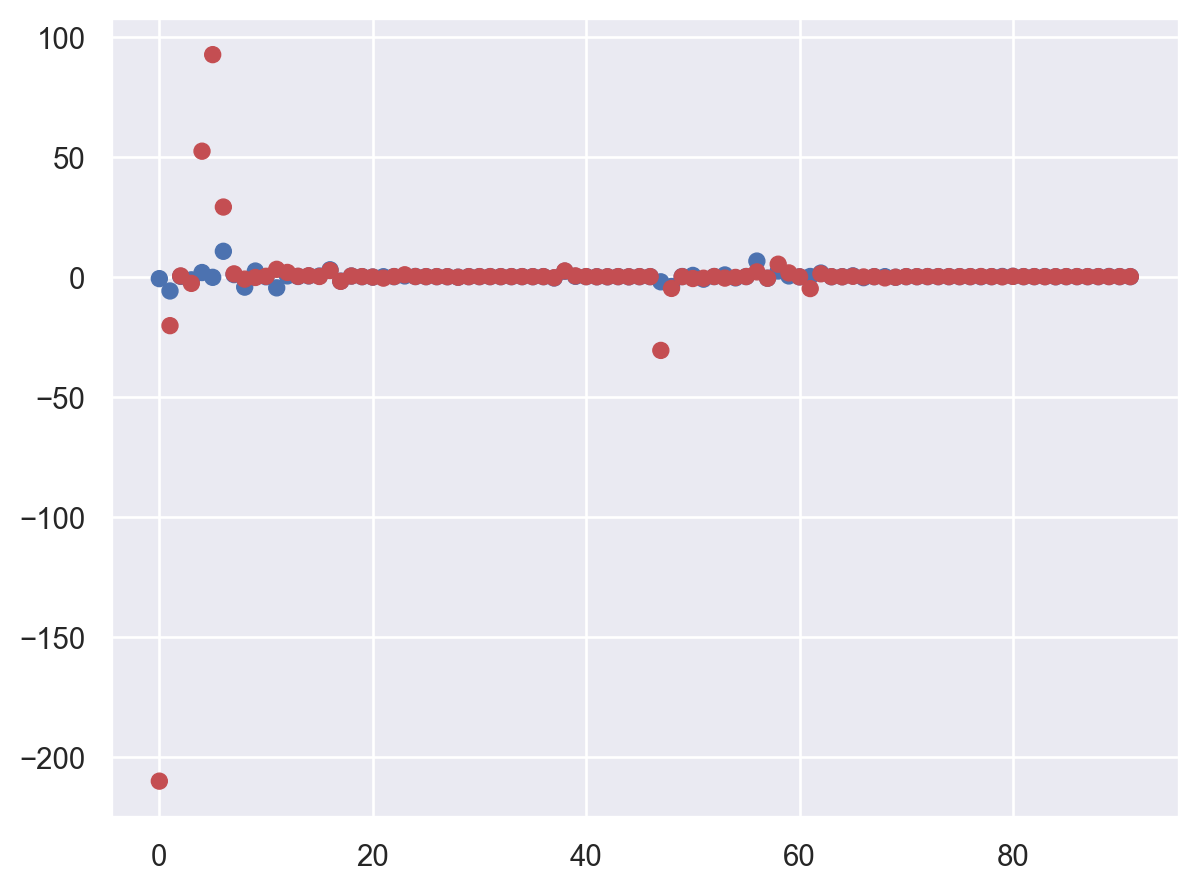

In [53]:
# Vemos que obtuvimos un menor error.
# Podemos comparar los coeficientes gráficamente:
(
    so.Plot(x = np.arange(X.shape[1]))
    .add(so.Dot(color = "b"), y = modeloRidge.coef_.squeeze())
    .add(so.Dot(color = "r"), y = modeloLineal.coef_.squeeze())
)


# Preprocesamiento
En muchos casos, necesitamos realizar algunas transformaciones previas en los datos antes de ajustar un modelo de regresión

1. Escalamiento MinMax

In [54]:
basketball = pd.read_csv("CollegeBasketballPlayers2009-2021.csv")
basketball.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9136\78964569.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  basketball = pd.read_csv("CollegeBasketballPlayers2009-2021.csv")


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000


In [55]:
# Nos quedamos solo con las variables numéricas
basketNumeric = basketball.select_dtypes(include='number')

In [56]:
# Eliminamos primero las columnas con más de 100 datos faltantes
nan_cols = basketNumeric.isna().sum() > 100  # Vector booleano
keep = nan_cols.index[~(nan_cols)] # Lista con los nombres de las columnas para dejar
basketNumeric = basketNumeric[keep] # Seleccionamos solo las columnas en keep

In [57]:
# Ahora eliminamos todas las filas con datos faltantes
basketNumericClean = basketNumeric.dropna()
basketNumericClean

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 65
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,...,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,6.22026
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,...,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,3.94375
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,...,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,10.92680
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,...,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,6.77427
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,...,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,2,0.3,60.5,19.3,0.0,0.00,0.0,0.0,51.1,0.0,...,2.143290,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,0.00000
61057,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,0.0,50.3,...,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,0.00000
61058,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,-3.524820,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
61059,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,-1.876040,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000


In [58]:
# Ajustamos primero un modelo lineal sobre todos los datos para predecir la variable pts en función del resto
y = basketNumericClean["pts"]
X = basketNumericClean.drop(["pts"], axis=1)

In [60]:
# Inicializamos el modelo lineal
modeloLineal = linear_model.LinearRegression()  # alpha is the hyperparameter equivalent to lambda

# Entrenamiento
modeloLineal.fit(X, y)

# Predicciones
y_pred = modeloLineal.predict(X)

# Evaluación
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y, y_pred)
print("R2: ", r2)

Raíz del Error Cuadrático Medio: 0.53186
R2:  0.9884454952158966


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


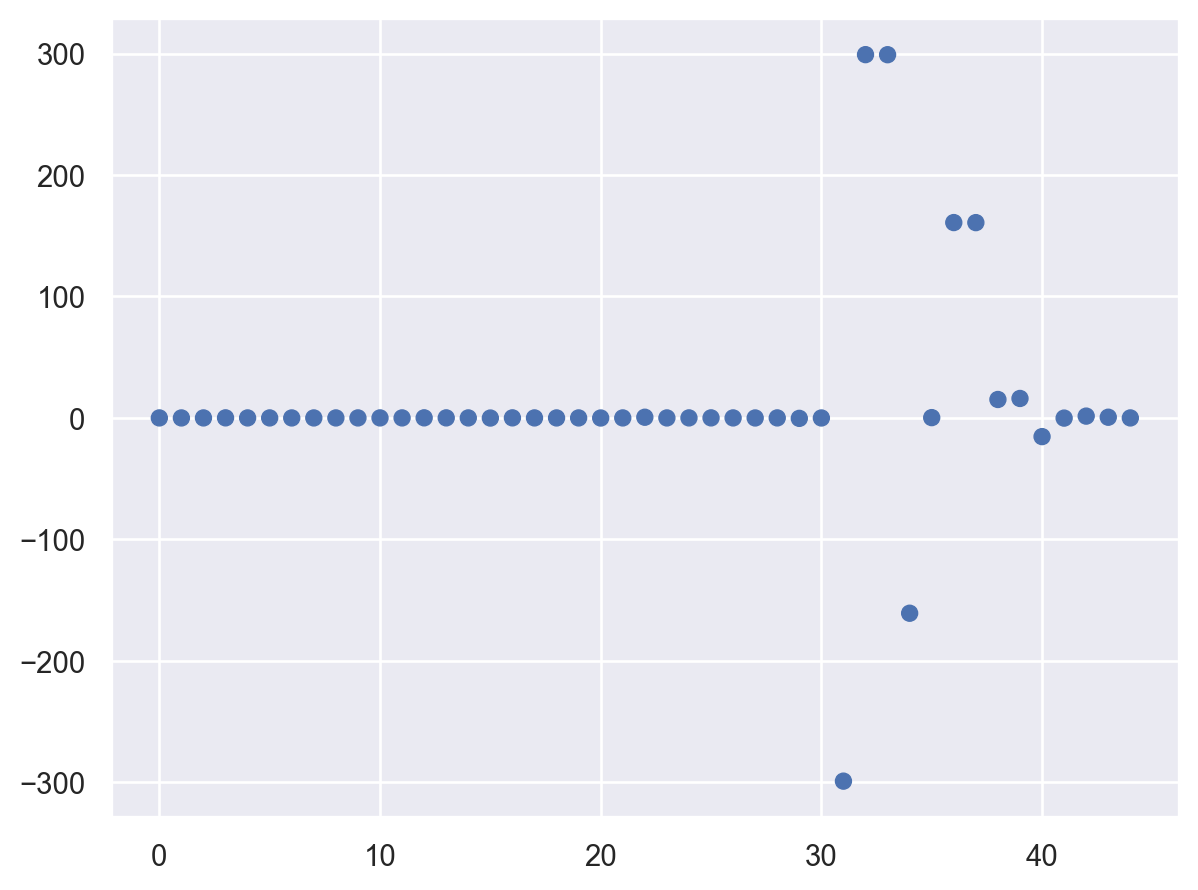

In [61]:
so.Plot(x = np.arange(len(modeloLineal.coef_)), y = modeloLineal.coef_).add(so.Dot())

Observando los coeficientes, hay coeficientes grandes que se cancelan, indicando posible colinealidad, lo que sugiere utilizar regresión Ridge.
Como hay mucha diferencia en los coeficientes (podemos comprobar esto haciendo X.max()), podemos hacer escalamiento MinMax para comparar mejor los coeficientesa.

In [62]:
X_scaled = (X - X.min()) / (X.max() - X.min())
print(X_scaled.min())
print(X_scaled.max())

GP             0.0
Min_per        0.0
Ortg           0.0
usg            0.0
eFG            0.0
TS_per         0.0
ORB_per        0.0
DRB_per        0.0
AST_per        0.0
TO_per         0.0
FTM            0.0
FTA            0.0
FT_per         0.0
twoPM          0.0
twoPA          0.0
twoP_per       0.0
TPM            0.0
TPA            0.0
TP_per         0.0
blk_per        0.0
stl_per        0.0
ftr            0.0
porpag         0.0
adjoe          0.0
pfr            0.0
year           0.0
pid            0.0
drtg           0.0
adrtg          0.0
dporpag        0.0
stops          0.0
bpm            0.0
obpm           0.0
dbpm           0.0
gbpm           0.0
mp             0.0
ogbpm          0.0
dgbpm          0.0
oreb           0.0
dreb           0.0
treb           0.0
ast            0.0
stl            0.0
blk            0.0
Unnamed: 65    0.0
dtype: float64
GP             1.0
Min_per        1.0
Ortg           1.0
usg            1.0
eFG            1.0
TS_per         1.0
ORB_per        1

Escalamos las variables utilizando escalamiento MinMax.
La regresión lineal ordinaria es invariante por escalamiento lineal.
Esto quiere decir que si bien los coeficientes van a cambiar, las predicciones se van a mantener iguales.
El escalamiento no va a solucionar los problemas de colinealidad, pero nos permite comparar mejor los coeficientes.


In [63]:
# Ponemos todo en una instrucción
X_scaled = (X - X.min()) / (X.max() - X.min())

In [64]:
# Inicializamos el modelo lineal
modeloLineal = linear_model.LinearRegression() 

# Entrenamiento
modeloLineal.fit(X_scaled, y)

# Predicciones
y_pred = modeloLineal.predict(X_scaled)

# Evaluación
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y, y_pred)
print(f"R cuadrado: {r2:.5f}")

Raíz del Error Cuadrático Medio: 0.53186
R cuadrado: 0.98845


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


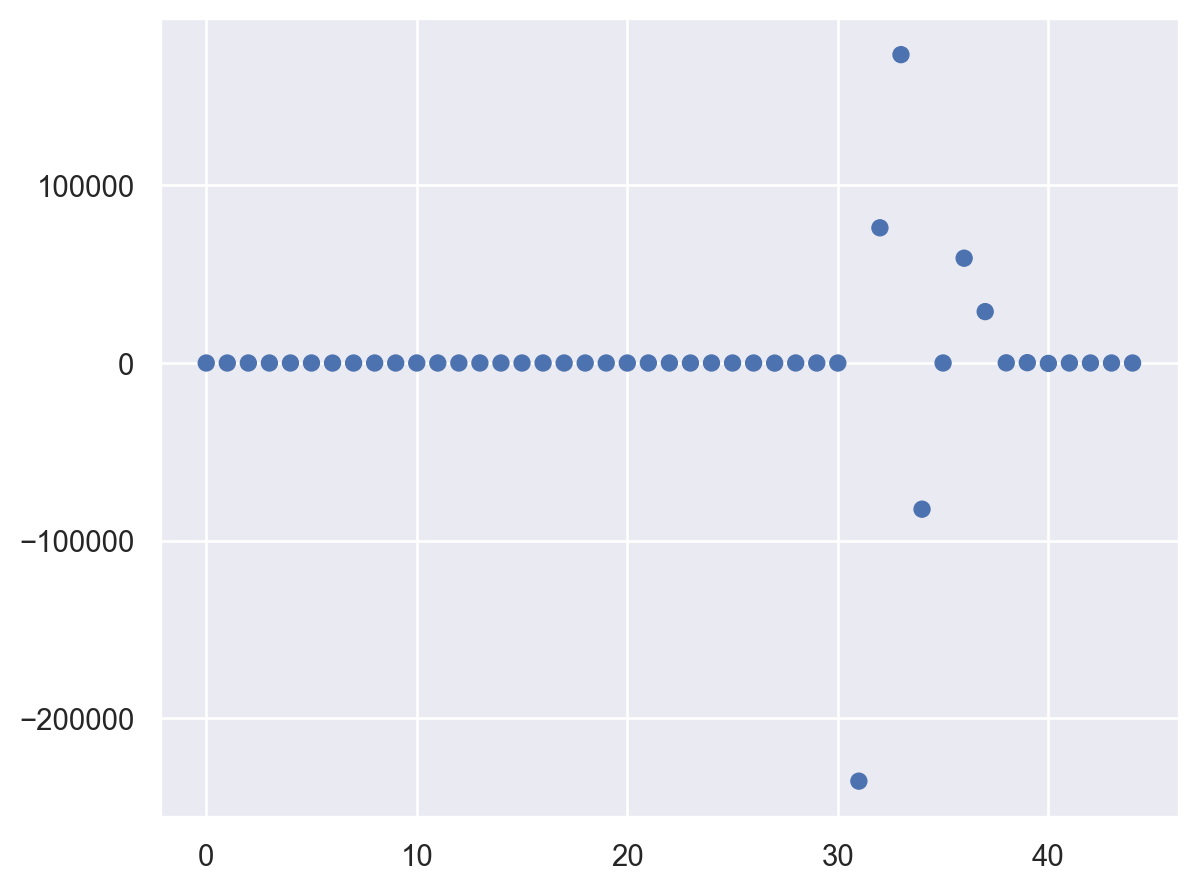

In [65]:
# Seguimos observando coeficientes enormes que se cancelan mutuamente.
so.Plot(x = np.arange(len(modeloLineal.coef_)), y = modeloLineal.coef_).add(so.Dot())

En base a lo observado, vamos a utilizar un modelo de Regresión Ridge.
Entonces primero, separamos en entrenamiento y testeo

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Inicializamos el modelo lineal
modeloRidge = linear_model.Ridge(alpha = 1)  # Ejercicio: calcular alpha por validacion cruzada

# Entrenamiento
modeloRidge.fit(X_train, y_train)

# Predicciones
y_pred = modeloRidge.predict(X_train)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y_train, y_pred)
print(f"R cuadrado: {r2:.5f}")

Raíz del Error Cuadrático Medio: 0.53298
R cuadrado: 0.98841


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


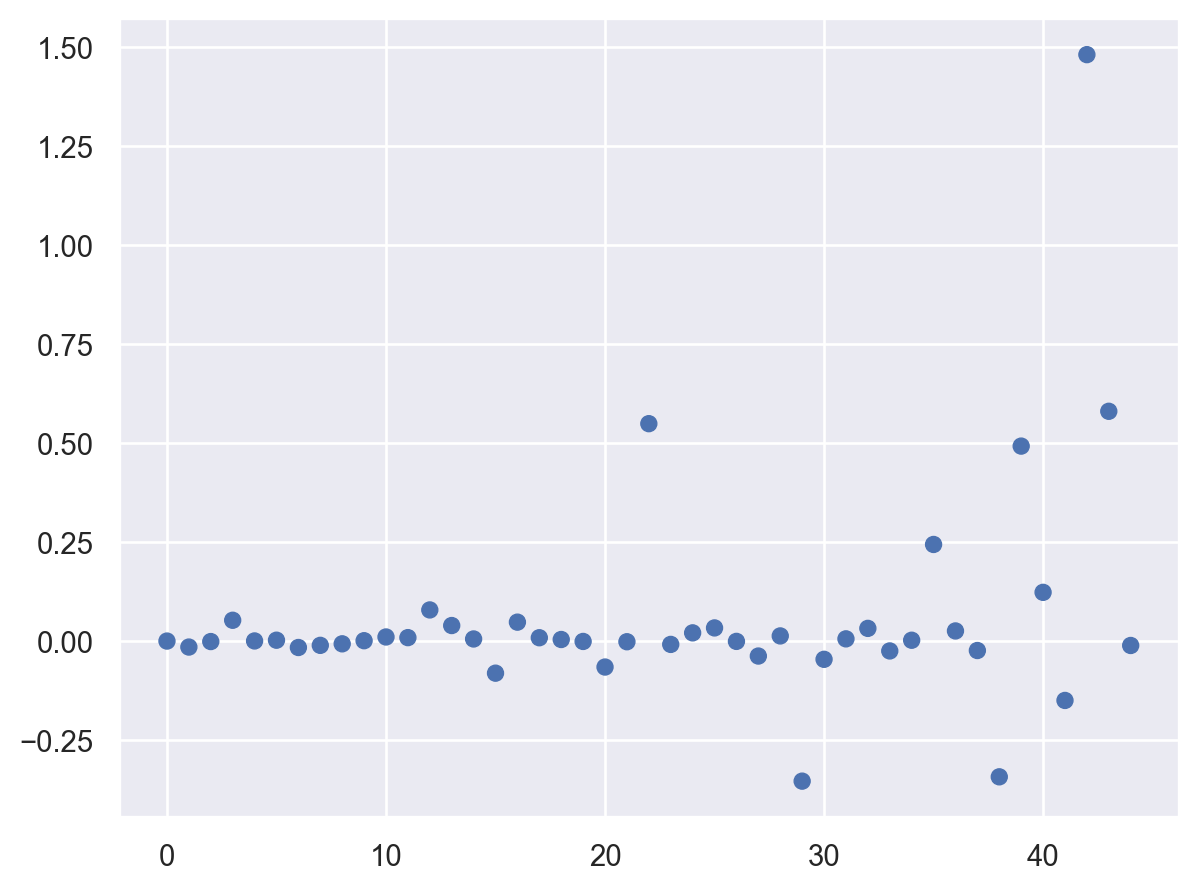

In [68]:
# Observamos los coeficientes
so.Plot(x = np.arange(len(modeloRidge.coef_)), y = modeloRidge.coef_).add(so.Dot())

Redujimos el problema de coeficientes grandes que se anulan, pero todavía resulta difícil comparar los pesos de las distintas variables.

Además en el modelo lineal Ridge penalizamos coeficientes grandes. Si las variables están a distinta escala, esto hace que penalicemos más a algunas variables que a otras.

En Regresión Ridge casi siempre es necesario escalar las variables.

Reescalamos todas las variables a 

Utilizamos ahora MinMaxScaler de sklearn para las transformaciones. Esto permite calcular los parámetros de la transformación en el conjunto de entrenamiento y aplicarlo en el conjunto de testeo.[0,1].

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().set_output(transform="pandas") # La última opción hace que nos devuelva un DataFrame
scaler

MinMaxScaler()

In [72]:
# fit_transform calcula los coeficientes de la transformación y la aplica.
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled.max()

GP             1.0
Min_per        1.0
Ortg           1.0
usg            1.0
eFG            1.0
TS_per         1.0
ORB_per        1.0
DRB_per        1.0
AST_per        1.0
TO_per         1.0
FTM            1.0
FTA            1.0
FT_per         1.0
twoPM          1.0
twoPA          1.0
twoP_per       1.0
TPM            1.0
TPA            1.0
TP_per         1.0
blk_per        1.0
stl_per        1.0
ftr            1.0
porpag         1.0
adjoe          1.0
pfr            1.0
year           1.0
pid            1.0
drtg           1.0
adrtg          1.0
dporpag        1.0
stops          1.0
bpm            1.0
obpm           1.0
dbpm           1.0
gbpm           1.0
mp             1.0
ogbpm          1.0
dgbpm          1.0
oreb           1.0
dreb           1.0
treb           1.0
ast            1.0
stl            1.0
blk            1.0
Unnamed: 65    1.0
dtype: float64

In [73]:
# Inicializamos el modelo lineal
modeloLineal = linear_model.Ridge(alpha = 1) 

# Entrenamiento
modeloLineal.fit(X_train_scaled, y_train)

# Predicciones
y_pred = modeloLineal.predict(X_train_scaled)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y_train, y_pred)
print(f"R cuadrado: {r2:.5f}")

Raíz del Error Cuadrático Medio: 0.54374
R cuadrado: 0.98794


In [74]:
# Ahora queremos ver los resultados en testeo, para eso transformamos los datos de testeo.
# Tenemos que fittear en entrenamiento y aplicar esa transformación a los datos de testeo
scaler.fit(X_train)   # Primero fiteamos (este paso no es necesario si ya hicimos fit_transform en X_train)
X_test_scaled = scaler.transform(X_test)  # Luego transformamos

In [75]:
# Predicciones
y_pred = modeloLineal.predict(X_test_scaled)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y_test, y_pred)
print(f"R cuadrado: {r2:.5f}")

Raíz del Error Cuadrático Medio: 0.53805
R cuadrado: 0.98810


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


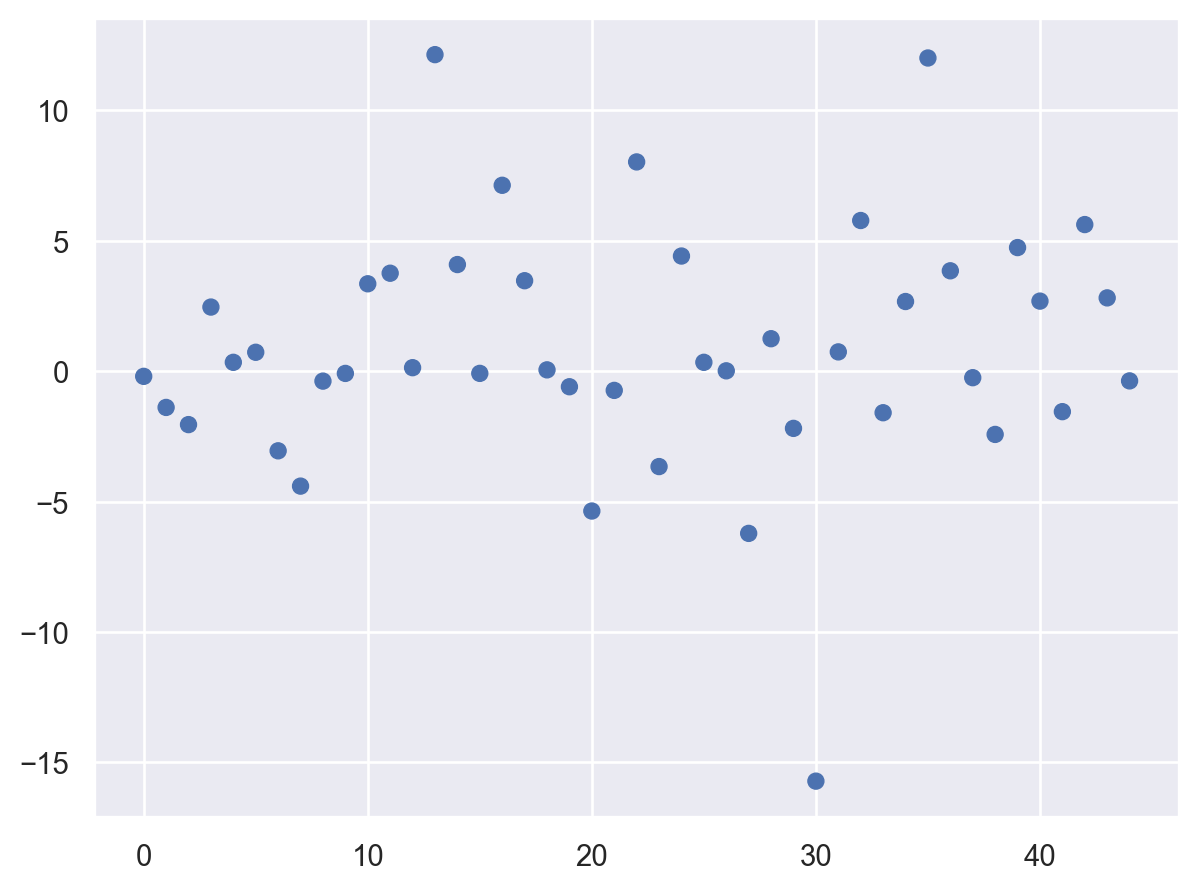

In [76]:
# Graficamos los coeficientes
so.Plot(x = np.arange(len(modeloLineal.coef_)), y = modeloLineal.coef_).add(so.Dot())

Vemos que ahora los coeficientes tienen rangos similares

# K-means

In [3]:
# Creamos el objeto de la clase KMeans pero no hacemos nada todavía
kmeans = KMeans(n_clusters=4)
# Asignamos cada observación a un cluster
etiquetas = kmeans.fit_predict(datos)

# Graficamos
(
	so.Plot(x = X[:,0], y = X[:,1], color=etiquetas.astype(str), marker=v)
	.add(so.Dot(pointsize =8))
)

NameError: name 'datos' is not defined

Ejemplo pingüinos

In [4]:
# eliminamos datos faltantes y reseteamos los índices, para no tener problemas al graficar
penguins = sns.load_dataset("penguins").dropna().reset_index(drop=True)

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


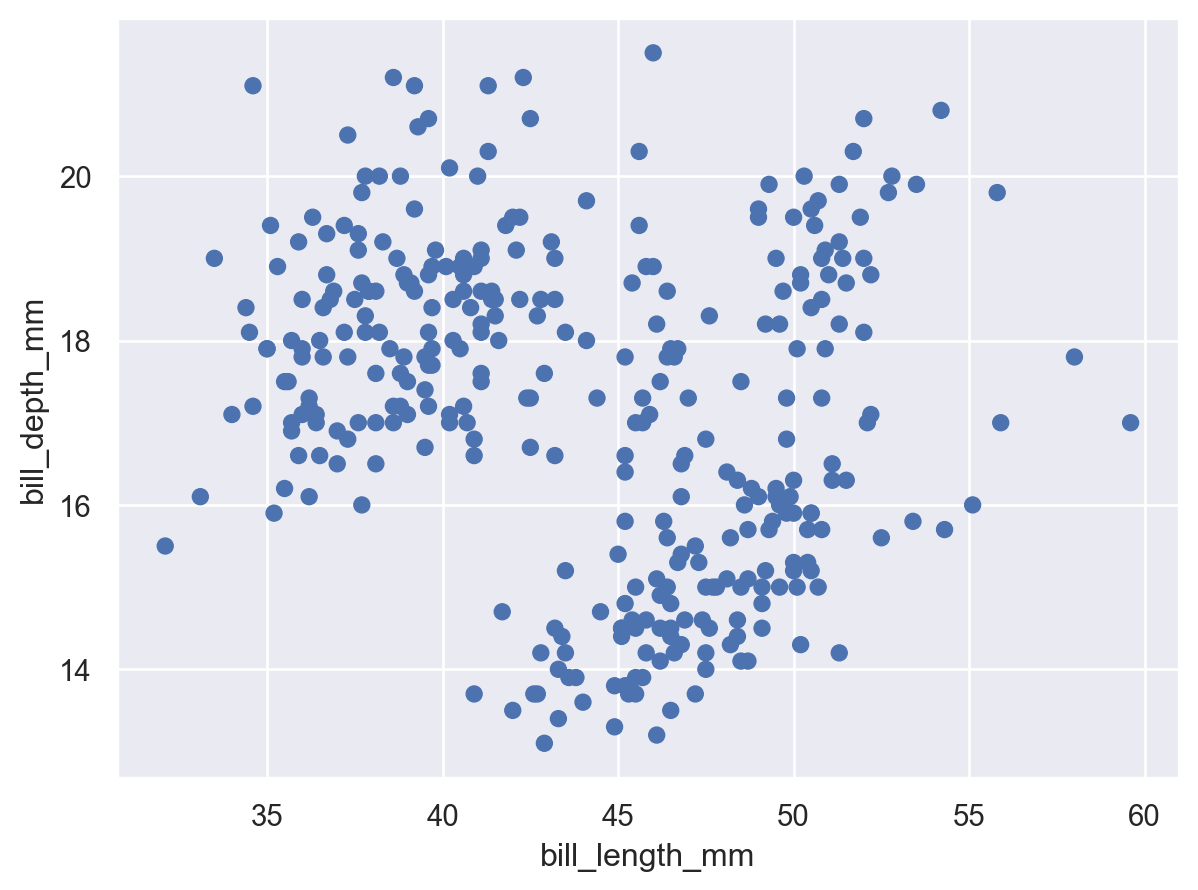

In [5]:
(
	so.Plot()
	.add(so.Dot(), data=penguins, x="bill_length_mm", y="bill_depth_mm")
)

In [8]:
penguins[["bill_length_mm", "bill_depth_mm"]] # devuelve un dataframe con las columnas bill_length_mm y bill_depth_mm

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,36.7,19.3
4,39.3,20.6
...,...,...
328,47.2,13.7
329,46.8,14.3
330,50.4,15.7
331,45.2,14.8


In [9]:
# Agrupamos los datos en 3 clusters por k-medias utilizando solo las variables bill_length_mm y bill_depth_mm
kmeans = KMeans(n_clusters=3)
# Asignamos cada observación a un cluster
cluster = kmeans.fit_predict(penguins[["bill_length_mm", "bill_depth_mm"]])

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


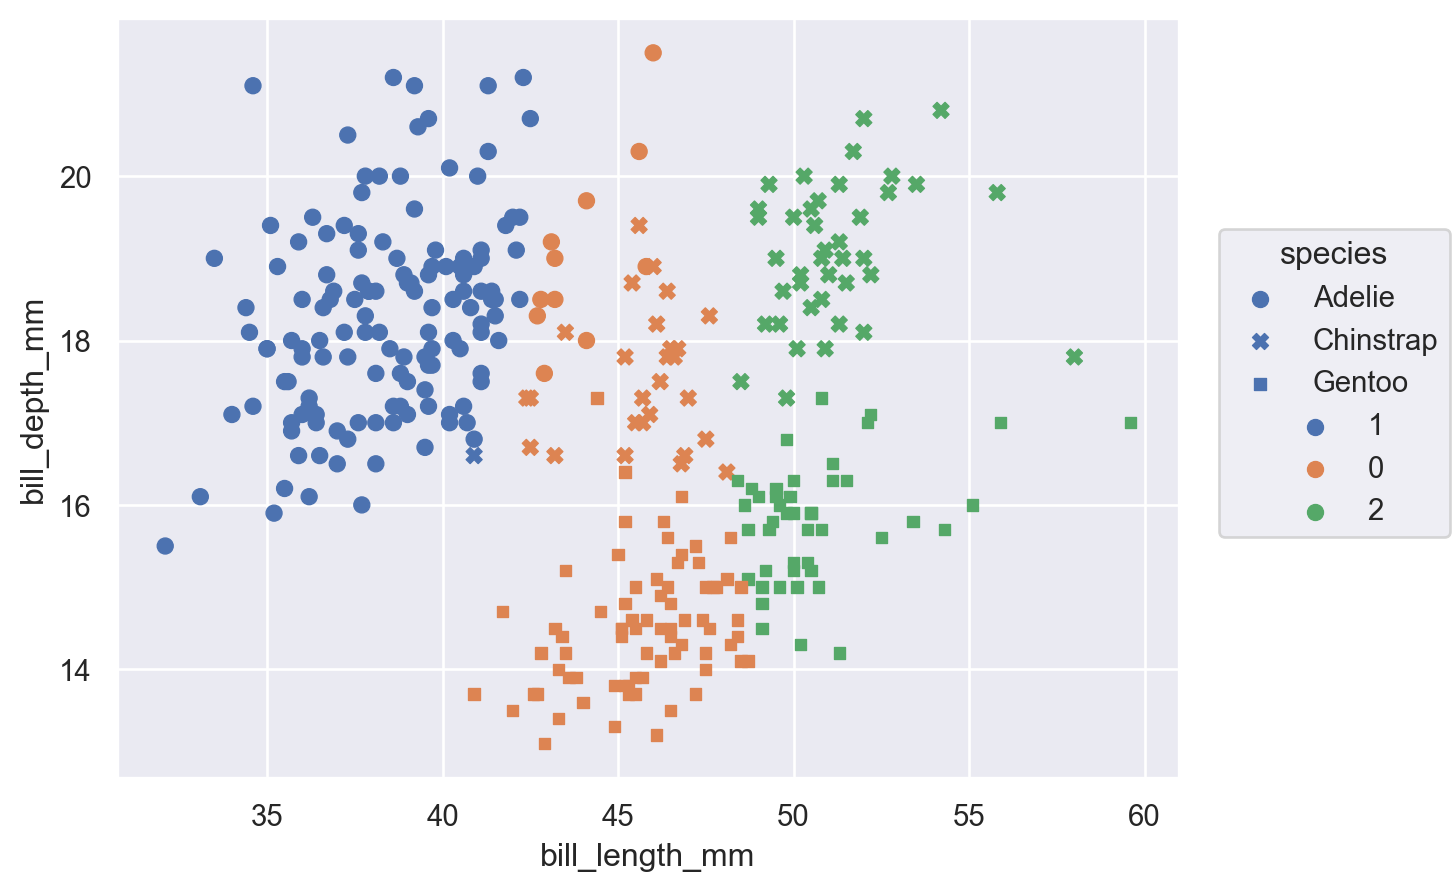

In [10]:
# Repetir el gráfico asignando colores según el cluster
(
    so.Plot()
    .add(so.Dot(), data = penguins, x = "bill_length_mm", y = "bill_depth_mm", marker = "species", color = cluster.astype("str"))
    #.add(so.Dot(color = "red", pointsize = 10), x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1])
)

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


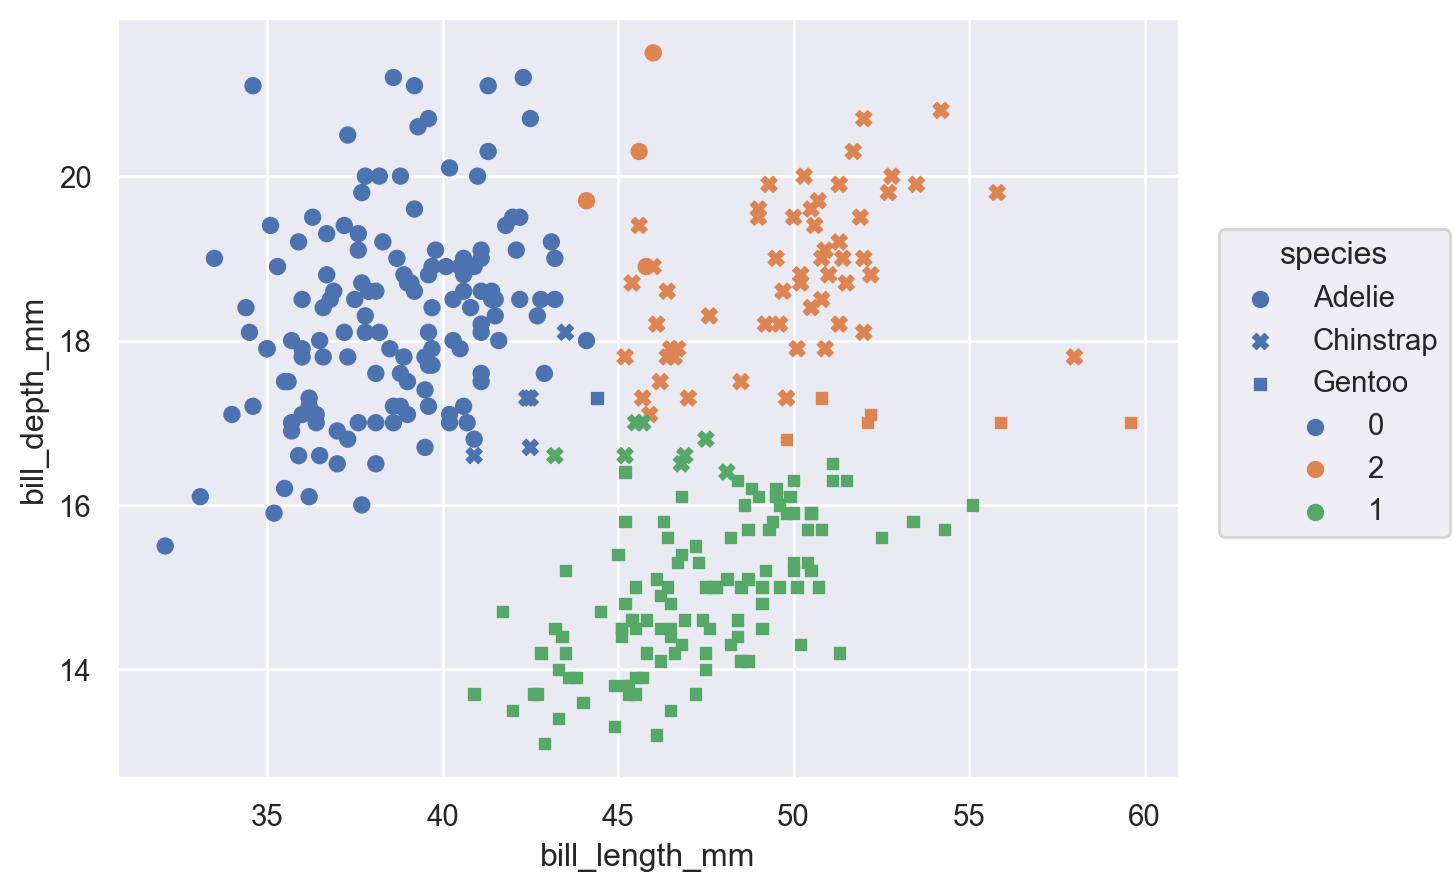

In [15]:
# Repetir el agrupamiento escalando previamente los datos por MinMax. Mejoran los clusters?
scaler = MinMaxScaler().set_output(transform="pandas")
data = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
data = scaler.fit_transform(X=data)
kmeans = KMeans(n_clusters=3)
cluster = kmeans.fit_predict(data[["bill_length_mm", "bill_depth_mm"]])
(
    so.Plot()
    .add(so.Dot(), data = penguins, x = "bill_length_mm", y = "bill_depth_mm", marker = "species", color = cluster.astype("str"))
    #.add(so.Dot(color = "red", pointsize = 10), x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1])
)

# Mejoraron los clusters!

0. Escalar los Datos (por ej, con MinMax)
scaler = MinMaxScaler().set_output(transform="pandas")
data = datos
data = scaler.fit_transform(X=data)
1. Inicialización: Selecciona k puntos aleatoriamente del conjunto de datos como los centros iniciales.
kmeans = KMeans(n_clusters=?, random_state=0)
2. Asignación de clusters: asigna cada punto de datos al centro más cercano. Esto se hace calculando la distancia de cada punto de datos a cada centro y asignando el punto al cluster del centro más cercano (con argmin).
cluster = kmeans.fit_predict(data)
3. Actualización de centros: calcula la nueva posición de cada centro como la media de todos los puntos de datos asignados a ese centro.
4. Repetición: repite los pasos de asignación de clusters y actualización de centros hasta que los centros no cambien significativamente (convergencia) o se alcance el número máximo de iteraciones

# AGREGAR DBSCAN Y K-NN

# Componentes principales

Ejercicio 1
1. Construir la matriz de datos X con las variables "bill_length_mm" y "bill_depth_mm"
2. Construir la matriz X* de datos normalizados (media 0).
3. Construir la matriz de covarianza Sigma.
4. Comparar con el resultado de np.cov(X.transpose(), bias = 1)

In [7]:
# ITEM 1
# Eliminamos datos faltantes y reseteamos los índices, para no tener problemas al graficar
penguins = sns.load_dataset("penguins").dropna().reset_index(drop=True)

# Normalizamos las variables "bill_length_mm" y "bill_depth_mm" por MinMax
penguins[["bill_length_mm", "bill_depth_mm"]] = MinMaxScaler().fit_transform(penguins[["bill_length_mm", "bill_depth_mm"]])

X = penguins[["bill_length_mm", "bill_depth_mm"]]
X.head()

,bill_length_mm,bill_depth_mm
0,0.254545,0.666667
1,0.269091,0.511905
2,0.298182,0.583333
3,0.167273,0.738095
4,0.261818,0.892857


In [9]:
# ITEM 2
# Media de cada columna 
media = X.mean()
X_star = X - media

In [10]:
# ITEM 3
n = len(X_star)
Sigma = ((X_star.T) @ X_star)/n 
Sigma

,bill_length_mm,bill_depth_mm
bill_length_mm,0.039427,-0.010626
bill_depth_mm,-0.010626,0.054794


In [11]:
# Comparamos con el comando np.cov de Numpy
# Tenemos que pasarle las variables como columnas.
# Si no usamos bias = 1, divide por n-1 en lugar de n.
np.cov(X.transpose(), bias = 1)

array([[ 0.03942681, -0.0106264 ],
       [-0.0106264 ,  0.05479369]])

Ejercicio 2
1. Calcular las componentes principales de la matrix X del ejercicio anterior.
2. Graficar los datos normalizados y las componentes principales.
3. Realizar un nuevo gráfico con los datos transformados.

In [20]:
# eigh es un comando especial para calcular autovalores y autovectores de matrices simétricas
# Devuelve una dupla:
# - la primer componente es el vector de autovalores, ordenados de menor a mayor
# - la segunda componente es la matriz de autovectores. la i-ésima columna de U es el autovector correspondiente al i-ésimo autovalor
gamma, U = np.linalg.eigh(Sigma) 
print(gamma)
print(U)
print()
# Los autovalores que nos devuelve eigh están siempre ordenados de menor a mayor.
# Damos vueltas los autovalores y las columnas de la matriz de autovectores usando np.flip(-,1)
gamma = np.flip(gamma)
print(gamma)
U = np.flip(U, 1)   # U tiene los autovectores de Sigma como columnas
print(U)

# U son las direcciones del nuevo espacio

[0.03399707 0.06022344]
[[-0.89048655 -0.45500956]
 [-0.45500956  0.89048655]]

[0.06022344 0.03399707]
[[-0.45500956 -0.89048655]
 [ 0.89048655 -0.45500956]]


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


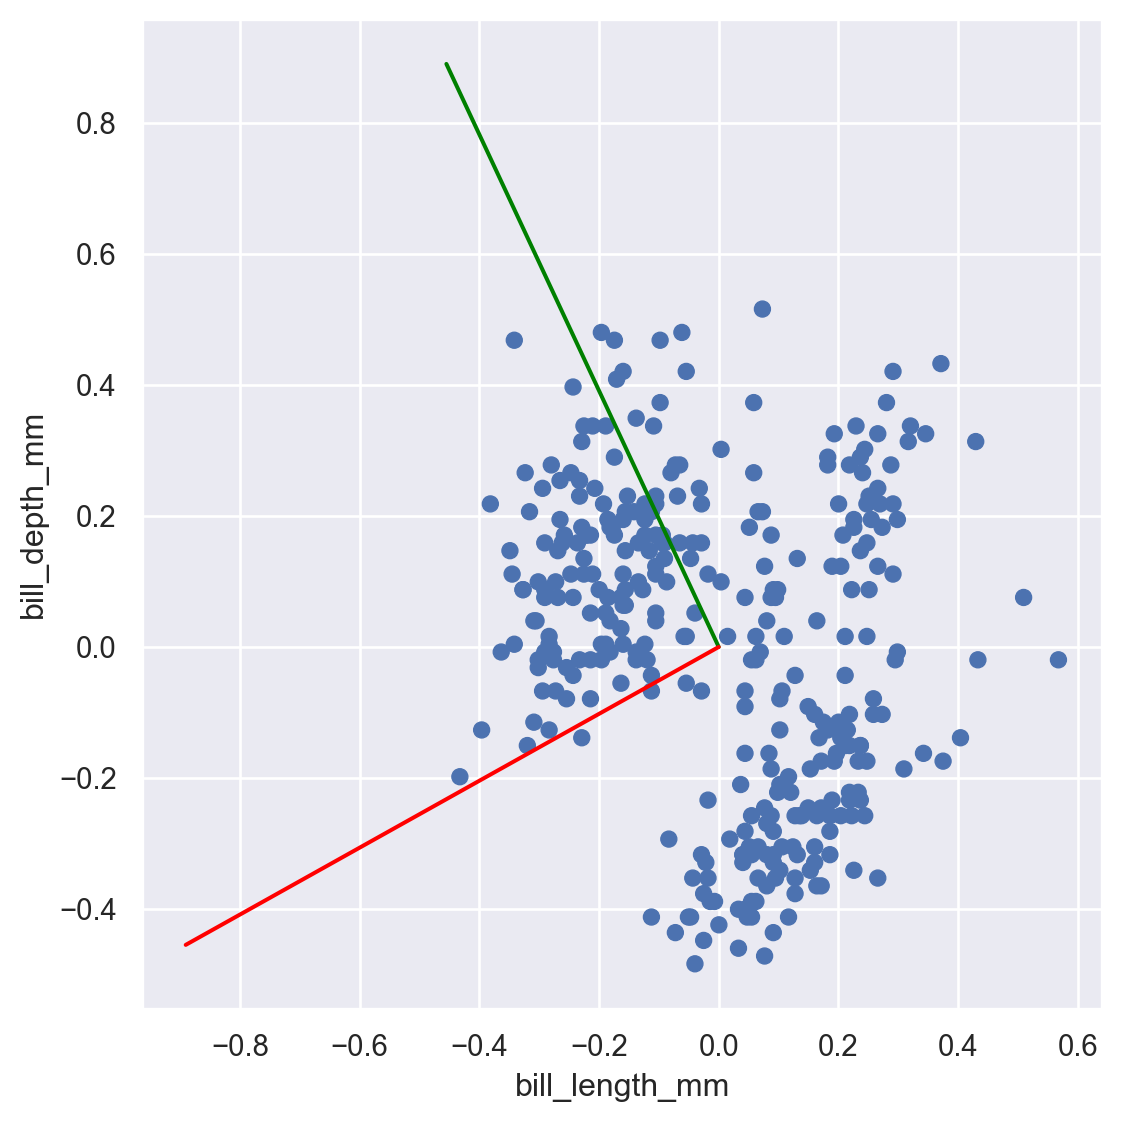

In [21]:
(
    so.Plot()
    .add(so.Dot(), x = X_star["bill_length_mm"], y = X_star["bill_depth_mm"])
    .add(so.Line(color = "green"), x = [0, U[0,0]], y = [0, U[1,0]]) # Primera dirección principal
    .add(so.Line(color = "red"), x = [0, U[0,1]], y = [0, U[1,1]]) # Segunda dirección principal
    .layout(size = (6,6))
)

,Z1,Z2
0,0.243695,0.075280
1,0.099264,0.132746
2,0.149633,0.074340
3,0.347011,0.120495
4,0.441806,-0.034115
...,...,...
328,-0.420377,0.083830
329,-0.350153,0.064282
330,-0.261303,-0.128125
331,-0.270674,0.089009


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


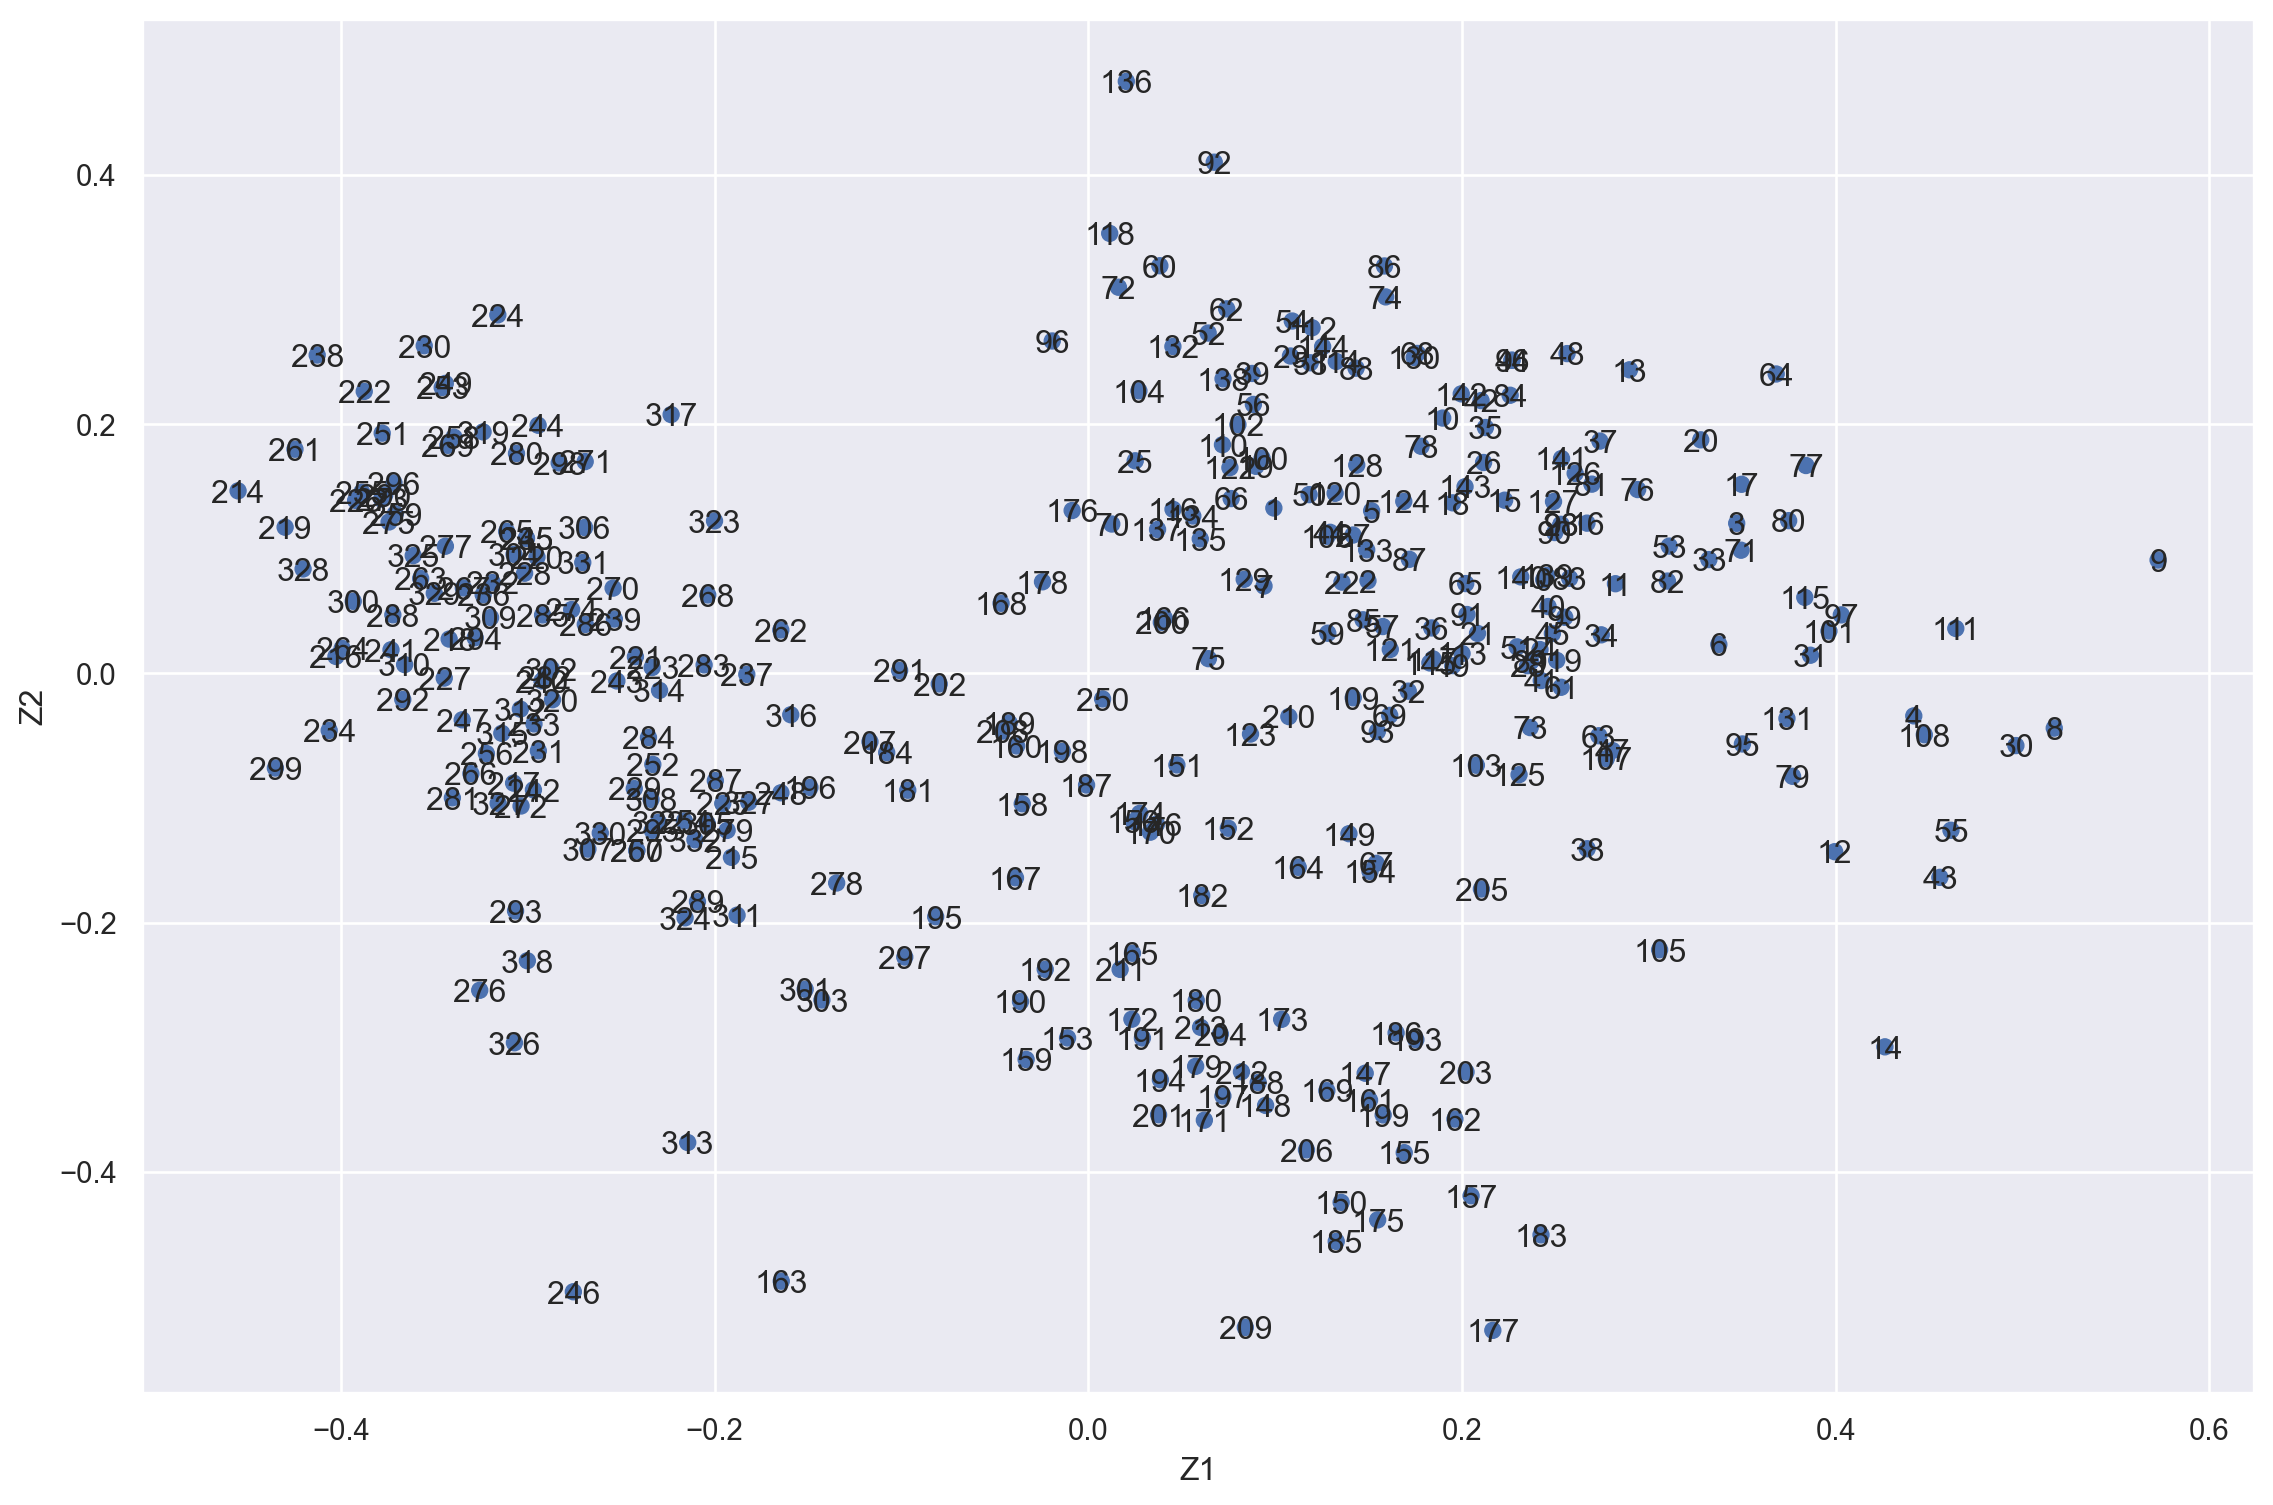

In [29]:
# Calculamos las componentes principales usando la formula
# Z = (X - Xraya) * U
Z = X_star @ U
Z.columns = ["Z1", "Z2"]  # Renombramos las columnas
display(Z)
# Graficamos las nuevas variables.
(
    so.Plot(data = Z, x = "Z1", y = "Z2", text = X.index)
    .add(so.Dot())
    .add(so.Text())
    .layout(size=(12,8))
)

In [32]:
# Repetimos todo lo mismo usando los comandos de Python
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_star)
print(principalComponents)

[[ 0.24369532 -0.07528023]
 [ 0.09926361 -0.13274585]
 [ 0.14963315 -0.0743401 ]
 [ 0.34701143 -0.12049474]
 [ 0.44180574  0.03411486]
 [ 0.15159521 -0.13050752]
 [ 0.33745002 -0.02329108]
 [ 0.09399239 -0.07010216]
 [ 0.51699398  0.04394861]
 [ 0.57257616 -0.09099348]
 [ 0.18965056 -0.20498458]
 [ 0.28211674 -0.07198242]
 [ 0.3994602   0.14315189]
 [ 0.2896575  -0.24372282]
 [ 0.42635814  0.29982079]
 [ 0.22280074 -0.13904308]
 [ 0.26685945 -0.1206141 ]
 [ 0.34964704 -0.15181659]
 [ 0.19498036 -0.13692411]
 [ 0.08964361 -0.16624634]
 [ 0.32777143 -0.18749572]
 [ 0.20827559 -0.03212502]
 [ 0.13572296 -0.07328062]
 [ 0.25294926 -0.11955461]
 [ 0.24173326 -0.01911281]
 [ 0.02505639 -0.17066331]
 [ 0.21152617 -0.16930544]
 [ 0.14166773 -0.11107873]
 [ 0.23511494 -0.00616028]
 [ 0.10815147 -0.25479509]
 [ 0.49646547  0.05796063]
 [ 0.38647246 -0.01457649]
 [ 0.17120128  0.01426833]
 [ 0.33212021 -0.09135155]
 [ 0.27451738 -0.03094618]
 [ 0.2125072  -0.19738915]
 [ 0.18376437 -0.03648232]
 

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


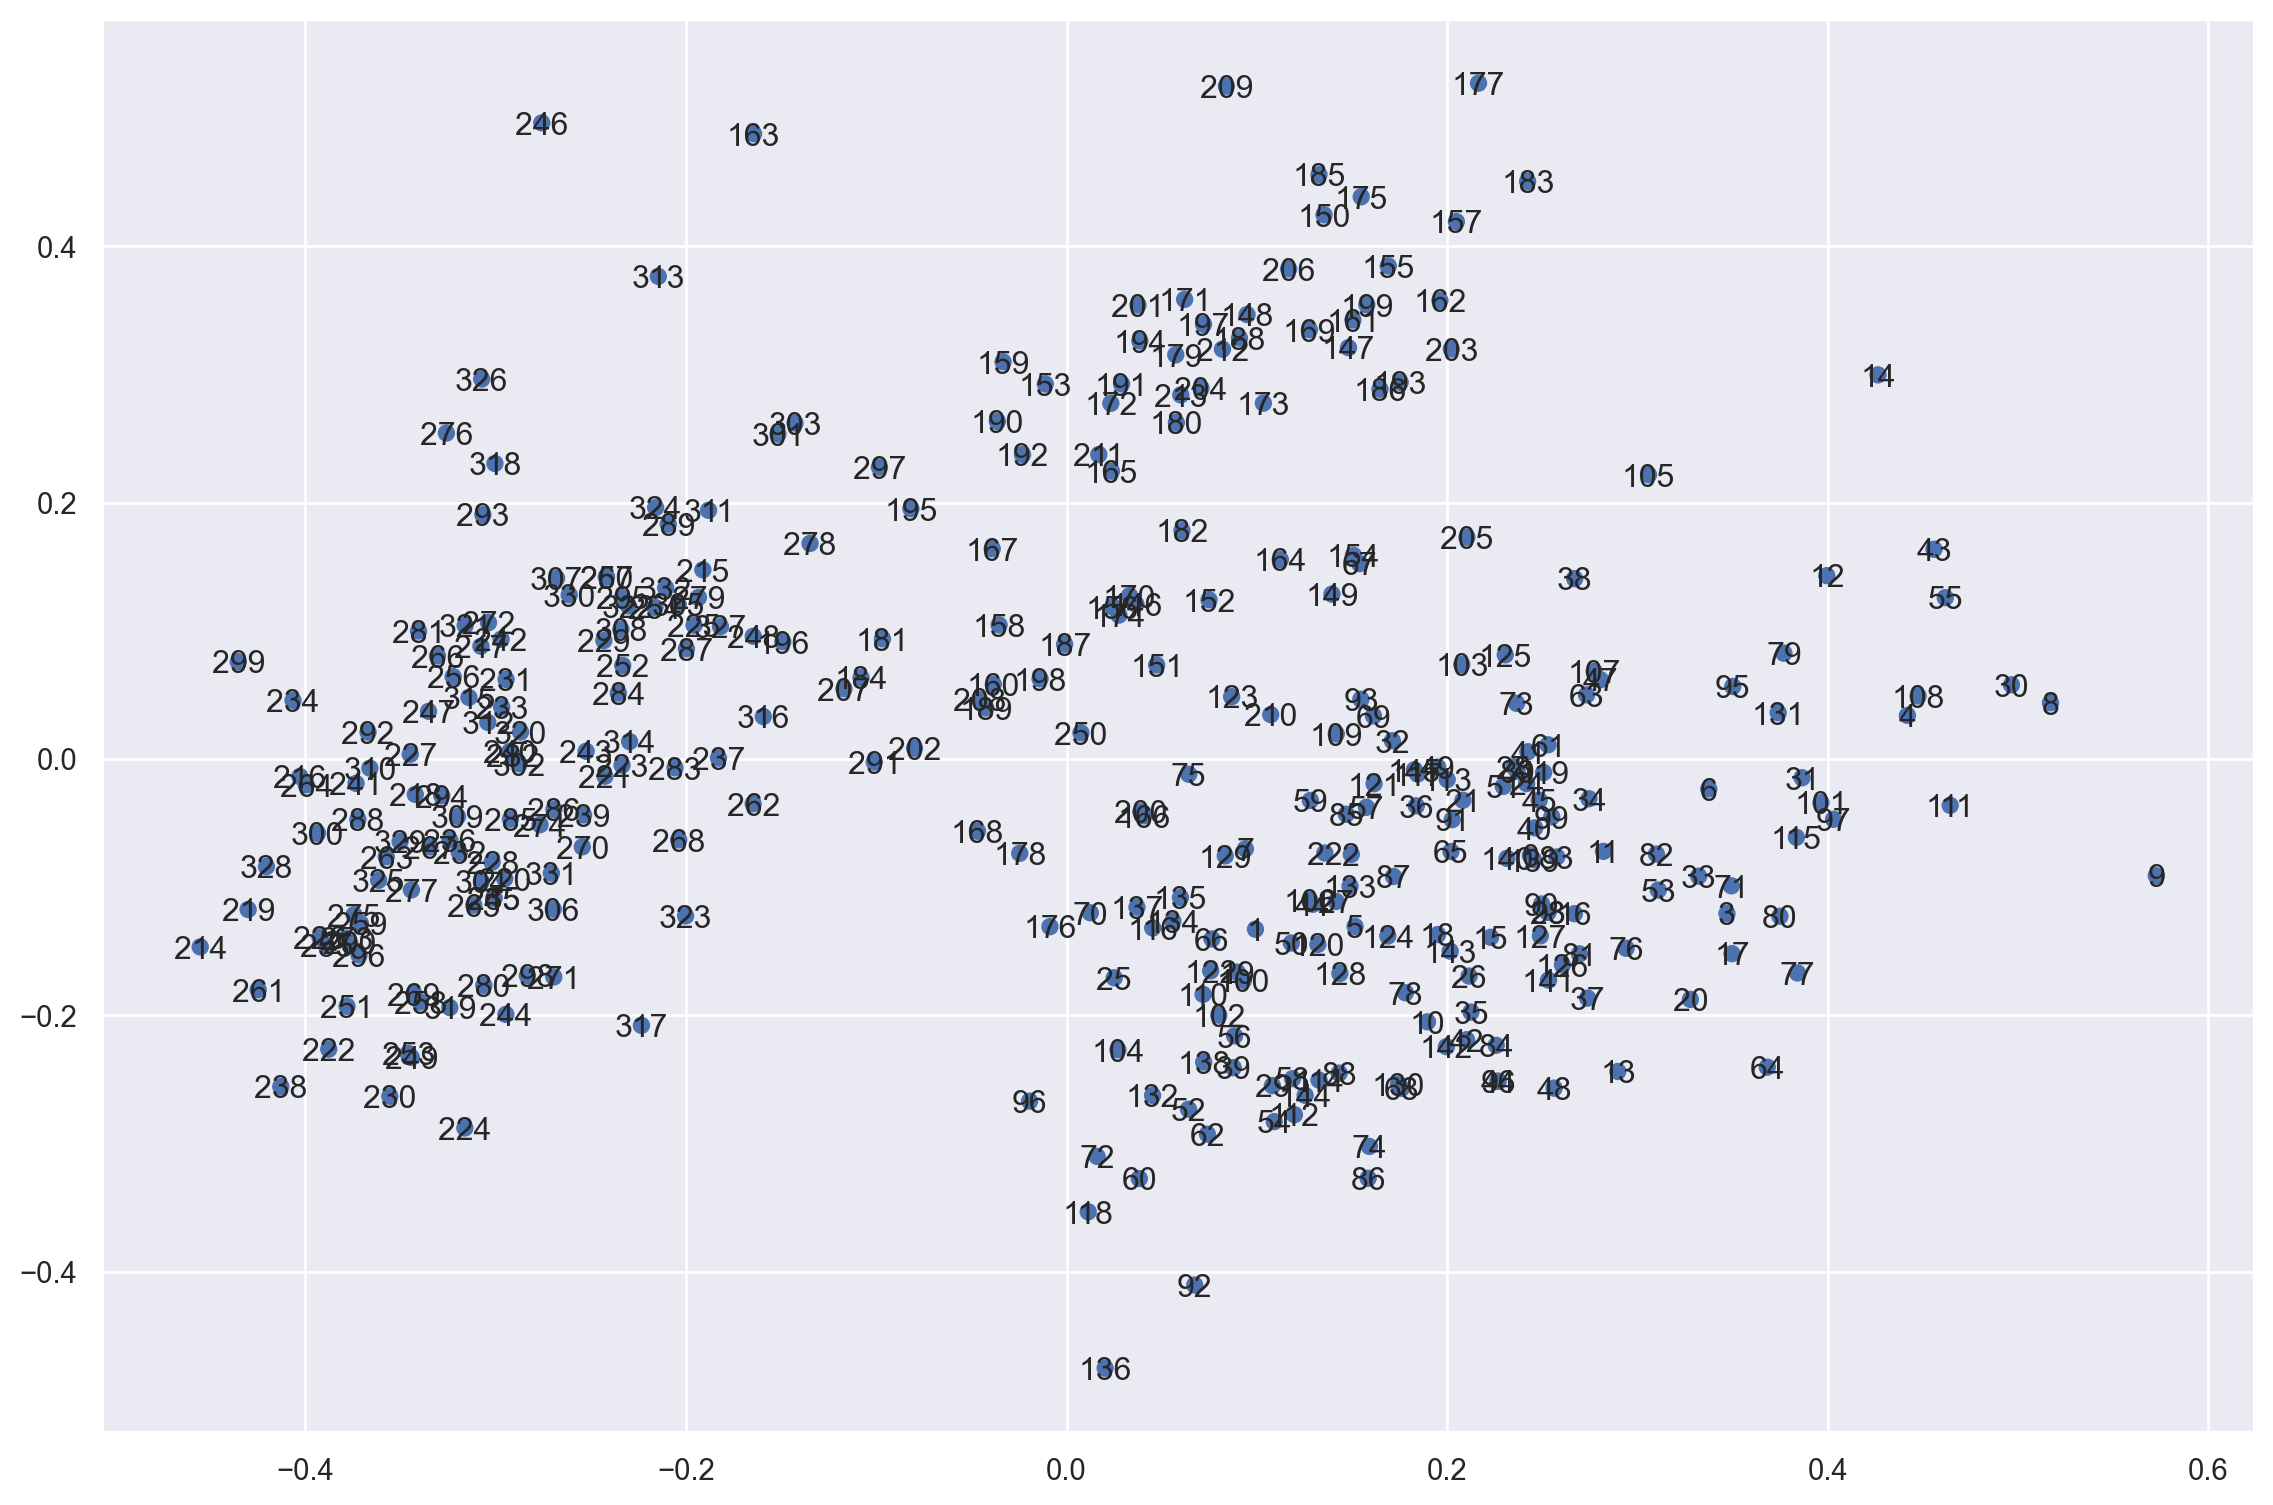

In [39]:
# Graficamos
(
	so.Plot(x = principalComponents[:,0], y = principalComponents[:,1], text = X.index)
	.add(so.Dot())
	.add(so.Text())
	.layout(size=(12,8))
)

In [40]:
# Veamos que variables aparecen más fuertemente en cada componente
pca.components_    # Esto nos da las direcciones (los coeficientes de la combinación lineal z = v_1 x_1 + ... v_p x_p)

array([[-0.45500956,  0.89048655],
       [ 0.89048655,  0.45500956]])

In [42]:
import numpy as np
from sklearn.decomposition import PCA

# Paso 1: Preprocesamiento de datos
# Supongamos que X es tu conjunto de datos

# Paso 2: Cálculo de la matriz de covarianza
cov_matrix = np.cov(X.T)

# Paso 3: Cálculo de autovalores y autovectores
autoval, autovect = np.linalg.eig(cov_matrix)

# Paso 4: Ordenar autovalores y autovectores
autoval = np.flip(autoval)
autovect = np.flip(autovect, 1)

# Paso 5: Variabilidad explicada
varianza_explicada = autoval / np.sum(autoval)

# Paso 6: Selección de componentes principales (este es el caso en que no tenemos idea de cuáles serían las principales componentes)
porcentaje_acumulado = np.cumsum(varianza_explicada)
num_componentes = np.argmax(porcentaje_acumulado >= 0.90) + 1  # Por ejemplo, mantener el 90% de la variabilidad

# Paso 7: Transformación de datos
pca = PCA(n_components=num_componentes)
componentes_principales = pca.fit_transform(X)

# Paso 8: Interpretación de componentes
print("Porcentaje de varianza explicada por cada componente:", varianza_explicada)
print("Varianza explicada acumulada:", porcentaje_acumulado)

Porcentaje de varianza explicada por cada componente: [0.63917548 0.36082452]
Varianza explicada acumulada: [0.63917548 1.        ]


# Tener en cuenta: componentes_principales = X @ autovect